In [31]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
from pandas_datareader.data import DataReader as dr
from __future__ import division


In [7]:
energy_list = ['XOM','CVS','BP']

In [17]:
end = datetime.now()  
start = datetime(end.year-1,end.month,end.day)

In [18]:
for stock in energy_list:
    globals()[stock]= dr(stock,"yahoo",start,end)

In [19]:
XOM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-08,86.309998,84.650002,84.790001,86.129997,13242400.0,82.349808
2018-10-09,86.879997,85.739998,86.379997,86.510002,10177900.0,82.713127
2018-10-10,86.820000,84.500000,86.730003,84.519997,16573400.0,80.810471
2018-10-11,84.169998,81.169998,83.940002,81.599998,20320100.0,78.018631
2018-10-12,82.239998,80.269997,82.129997,81.379997,15216300.0,77.808281


In [20]:
XOM.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,76.350637,75.128167,75.824701,75.737171,1.250216e+07,74.086465
std,4.417168,4.451790,4.451120,4.425460,4.538080e+06,3.905609
min,67.529999,64.650002,66.180000,65.510002,5.246100e+06,63.269753
25%,72.465000,71.520000,72.099998,72.020000,9.492400e+06,71.041676
50%,76.540001,75.589996,76.129997,75.930000,1.142450e+07,74.444366
75%,80.260002,78.715000,79.675003,79.485001,1.457885e+07,77.114746
max,86.879997,85.739998,86.730003,86.510002,4.728730e+07,82.713127


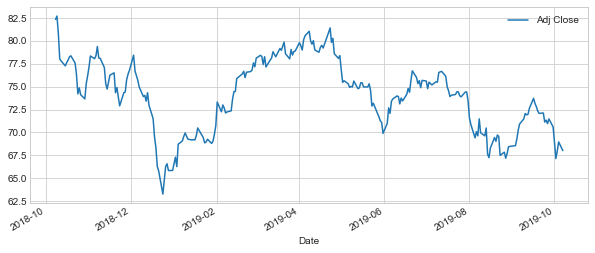

In [21]:
XOM['Adj Close'].plot(legend=True,figsize=(10,4))

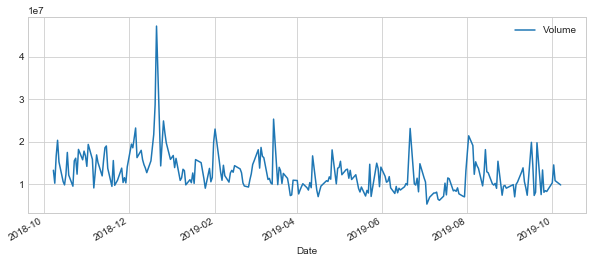

In [22]:
XOM['Volume'].plot(legend=True,figsize=(10,4))

In [23]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma)) #Getting moving Avg
    XOM[column_name] = XOM['Adj Close'].rolling(window=ma,center=False).mean()

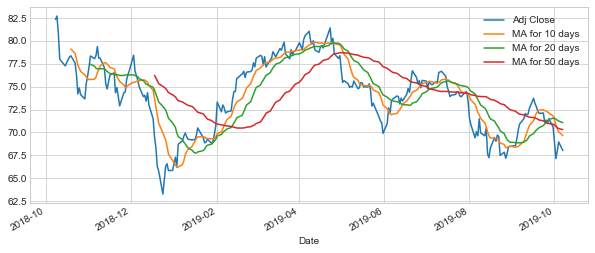

In [24]:
XOM[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [25]:
XOM.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2019-10-01,70.910004,68.910004,70.830002,68.949997,10279100.0,68.949997,71.386,71.5680,70.804712
2019-10-02,68.589996,67.010002,68.269997,67.150002,14503700.0,67.150002,70.819,71.4610,70.658825
2019-10-03,68.000000,66.309998,67.000000,67.980003,10788400.0,67.980003,70.384,71.3465,70.529735
2019-10-04,69.070000,67.820000,68.110001,68.970001,10534800.0,68.970001,70.073,71.2485,70.428939
2019-10-07,69.029999,68.019997,68.699997,68.019997,9773302.0,68.019997,69.662,71.0750,70.311514


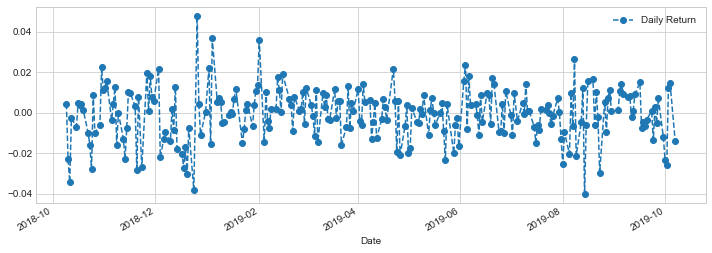

In [26]:
XOM['Daily Return'] = XOM['Adj Close'].pct_change()
XOM['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


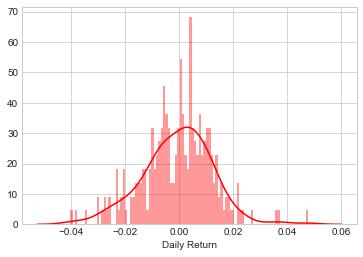

In [27]:
sns.distplot(XOM['Daily Return'].dropna(),bins=100,color='red')

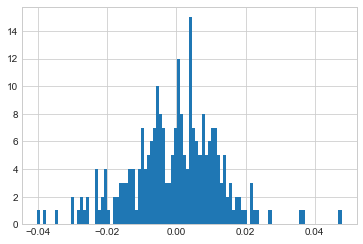

In [28]:
XOM['Daily Return'].hist(bins=100)

In [36]:
closing_df=dr(energy_list,'yahoo',start,end)['Adj Close']

In [37]:
closing_df.head()

Symbols,BP,CVS,XOM
Date,,,
2018-10-08,43.139511,77.213364,82.349808
2018-10-09,43.327847,76.913399,82.713127
2018-10-10,42.517982,76.361877,80.810471
2018-10-11,41.557446,70.817612,78.018631
2018-10-12,41.952961,72.162560,77.808281


In [39]:
energy_rets=closing_df.pct_change()

In [40]:
energy_rets.head()

Symbols,BP,CVS,XOM
Date,,,
2018-10-08,NaN,NaN,NaN
2018-10-09,0.004366,-0.003885,0.004412
2018-10-10,-0.018692,-0.007171,-0.023003
2018-10-11,-0.022591,-0.072605,-0.034548
2018-10-12,0.009517,0.018992,-0.002696


C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


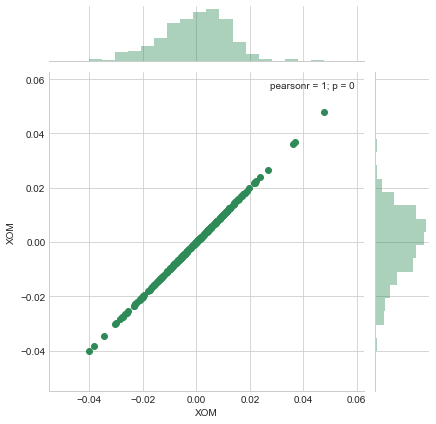

In [41]:
sns.jointplot('XOM','XOM',energy_rets,kind='scatter',color='seagreen')

C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


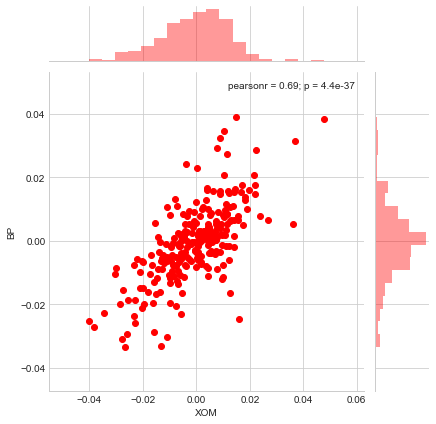

In [42]:
sns.jointplot('XOM','BP',energy_rets,kind='scatter',color='red')

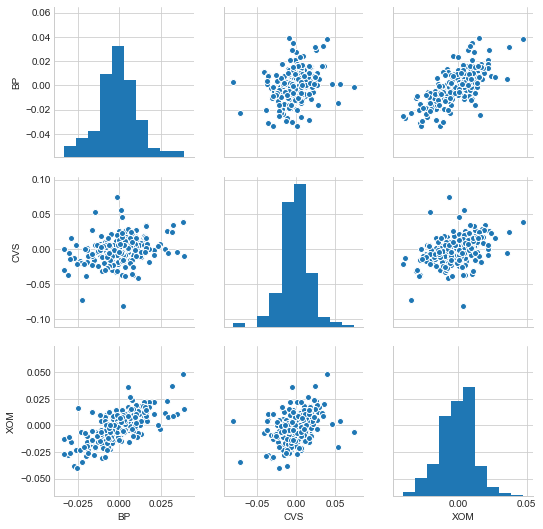

In [43]:
sns.pairplot(energy_rets.dropna())

C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


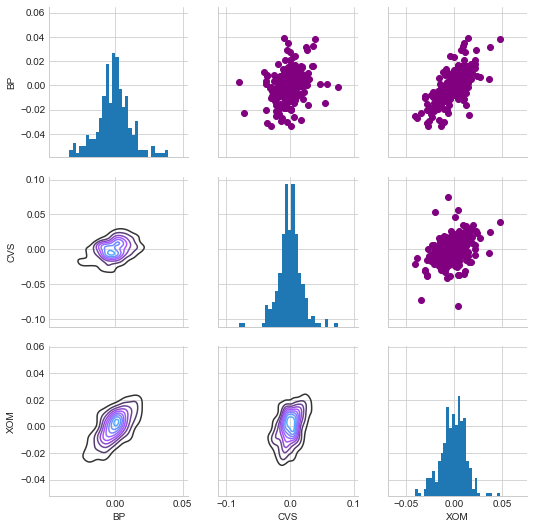

In [44]:
returns_fig = sns.PairGrid(energy_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


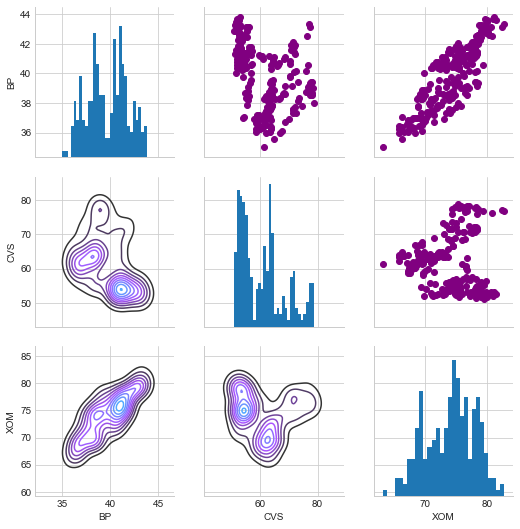

In [45]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

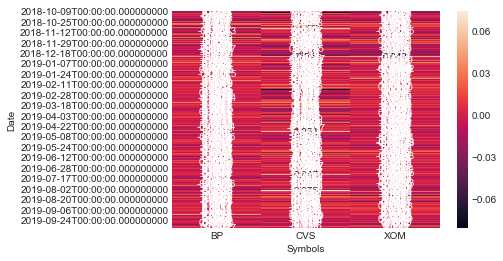

In [46]:
sns.heatmap(energy_rets.dropna(),annot=True)

In [49]:
rets = energy_rets.dropna()

area = np.pi*20

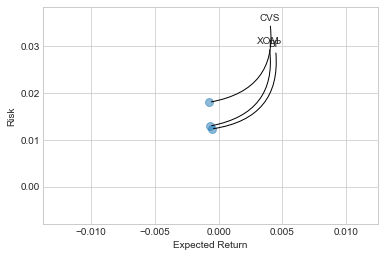

In [51]:
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (70, 80),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.5'))

C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


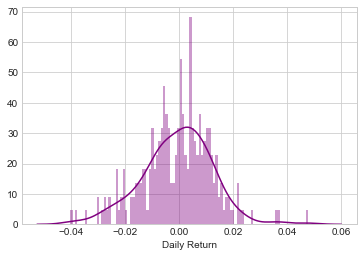

In [52]:
sns.distplot(XOM['Daily Return'].dropna(),bins=100,color='purple')

In [53]:
rets['XOM'].quantile(0.05)

-0.02323517286189427

In [54]:
days = 365

dt = 1/days
mu = rets.mean()['XOM']
sigma= rets.std()['XOM']

In [57]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)  
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt))
        
        drift [x] = mu*dt
        
        price[x] = price[x-1] +  (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [59]:
XOM.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2019-10-01,70.910004,68.910004,70.830002,68.949997,10279100.0,68.949997,71.386,71.5680,70.804712,-0.023509
2019-10-02,68.589996,67.010002,68.269997,67.150002,14503700.0,67.150002,70.819,71.4610,70.658825,-0.026106
2019-10-03,68.000000,66.309998,67.000000,67.980003,10788400.0,67.980003,70.384,71.3465,70.529735,0.012360
2019-10-04,69.070000,67.820000,68.110001,68.970001,10534800.0,68.970001,70.073,71.2485,70.428939,0.014563
2019-10-07,69.029999,68.019997,68.699997,68.019997,9773302.0,68.019997,69.662,71.0750,70.311514,-0.013774


In [60]:
start_price = 70.910004

Text(0.5,1,'Monte Carlo Analysis For XOM')

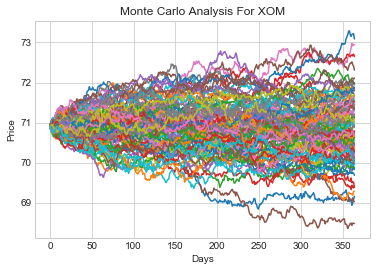

In [61]:
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis For XOM')


In [63]:
runs = 10000
simulations = np.zeros(runs)  # make a new array
for run in range(runs):
    simulations[run]= stock_monte_carlo(start_price,days,mu,sigma)[days-1]

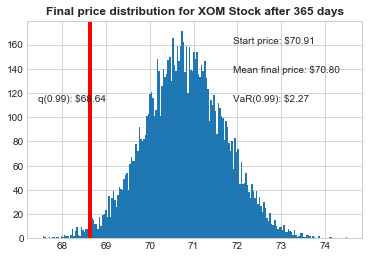

In [64]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for XOM Stock after %s days" % days, weight='bold');